# Fake News Assignment
**Authors**: Vilhelm Stiernstedt, Sharon Marín Salazar & Andrea Tondella
<br>
**Date**: 26/05/2018

In this section we briefly explore POS tagging of our data and see if there is a grammatical difference between real and fake news. 

# Bonus: POS Tagging

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading files

train_pathname = 'data/fake_or_real_news_training.csv'
test_pathname = 'data/fake_or_real_news_test.csv'

train = pd.read_csv(train_pathname)
test = pd.read_csv(test_pathname)

## Data Cleaning

### X1 and X2 columns

X1 and X2 are the first columns that need cleaning. Let's take a closer look at them. 

In [1]:
#train.X1.value_counts()

In [10]:
train.X2.value_counts()

FAKE    1
REAL    1
Name: X2, dtype: int64

My hypothesis is that in some of the articles (hopefully in the titles) there must be one or two commas that are interpreted as column breakers by read_csv. If this is the case, then the title will be split between title and text columns, the text will be in the label column and so on. The solution will be then to reconcatenate the title together under the title column and slide all the other columns by one (X1 has value and X2 is NaN) or to steps (both X1 and X2 have real values) to the left. 

In [2]:
#train[train.X1.notnull()]

Looking at the table above, it is not possible to state with 100% accuracy where the comma used to be, and therefore where the title of the news ends and where the text begins. The amount of corrupted rows is less than 1% of the total train data, so I consider dropping these rows as a safer option.

In [12]:
# Keeping only rows were X1 and X2 are NaN
train = train[train.X1.notnull() == False]

In [13]:
# And now dropping the columns X1 and X2 which now are empty, taking the chance to remove ID column as well
train.drop(columns=['X1', 'X2', 'ID'], inplace=True)

train.sample(5)

,title,text,label
3255,WikiLeaks Podesta Emails Confirm Hillary’s Hea...,We Are Change \nIssues surrounding Hillary Cli...,FAKE
3134,Knesset Speaker asks Vatican to join battle ag...,"October 26, 2016 Knesset Speaker asks Vatican ...",FAKE
2279,17 biblical rules for marriage the Kim Davis s...,Some people believe that Kentucky—or even all ...,REAL
3905,Nigel Farage held at Heathrow on return from T...,Monday 14 November 2016 by Benedict Farkerhaus...,FAKE
352,Trump and advisers remain split on how far to ...,Ten days after he appointed new campaign leade...,REAL


In [14]:
# Are there empty articles? <- I discovered this because of some issues with the POS tagging

# Substitute empty articles with NaN and dropping the rows
train.loc[train.text == ' '] = np.nan
train.dropna(inplace=True)

In [21]:
# What to do with title? 

### POS Tagging

In [16]:
# First Step: sentence tokenization
tok_sentences = []

for article in (train.text):
    tok_sentences.append(nltk.sent_tokenize(article))

In [17]:
# Second Step: word tokenization of the sentences and POS tagging
article_token = [] 

for idx, article in enumerate(tok_sentences):
    if ((idx%200) == 0):
        print('Processing articles', idx, '-', idx+200)
    sentence_token = []
    for sentence in article:
        sentence_token.append(nltk.pos_tag(nltk.word_tokenize(sentence)))
    article_token.append(sentence_token)

print('POS Tagging finished!')

Processing articles 0 - 200
Processing articles 200 - 400
Processing articles 400 - 600
Processing articles 600 - 800
Processing articles 800 - 1000
Processing articles 1000 - 1200
Processing articles 1200 - 1400
Processing articles 1400 - 1600
Processing articles 1600 - 1800
Processing articles 1800 - 2000
Processing articles 2000 - 2200
Processing articles 2200 - 2400
Processing articles 2400 - 2600
Processing articles 2600 - 2800
Processing articles 2800 - 3000
Processing articles 3000 - 3200
Processing articles 3200 - 3400
Processing articles 3400 - 3600
Processing articles 3600 - 3800
Processing articles 3800 - 4000
POS Tagging finished!


Now all the articles are tokenized and POS tagged!

In [18]:
# The firs level of the list returns an article:
article_token[0]

[[('Daniel', 'NNP'),
  ('Greenfield', 'NNP'),
  (',', ','),
  ('a', 'DT'),
  ('Shillman', 'NNP'),
  ('Journalism', 'NNP'),
  ('Fellow', 'NNP'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('Freedom', 'NNP'),
  ('Center', 'NNP'),
  (',', ','),
  ('is', 'VBZ'),
  ('a', 'DT'),
  ('New', 'NNP'),
  ('York', 'NNP'),
  ('writer', 'NN'),
  ('focusing', 'VBG'),
  ('on', 'IN'),
  ('radical', 'JJ'),
  ('Islam', 'NNP'),
  ('.', '.')],
 [('In', 'IN'),
  ('the', 'DT'),
  ('final', 'JJ'),
  ('stretch', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('election', 'NN'),
  (',', ','),
  ('Hillary', 'NNP'),
  ('Rodham', 'NNP'),
  ('Clinton', 'NNP'),
  ('has', 'VBZ'),
  ('gone', 'VBN'),
  ('to', 'TO'),
  ('war', 'NN'),
  ('with', 'IN'),
  ('the', 'DT'),
  ('FBI', 'NNP'),
  ('.', '.')],
 [('The', 'DT'),
  ('word', 'NN'),
  ('“', 'NNP'),
  ('unprecedented', 'VBD'),
  ('”', 'NNP'),
  ('has', 'VBZ'),
  ('been', 'VBN'),
  ('thrown', 'VBN'),
  ('around', 'IN'),
  ('so', 'RB'),
  ('often', 'RB'),
  ('this', 'DT'),
  ('electio

In [19]:
# The second level returns a sentence within the article:
article_token[0][0]

[('Daniel', 'NNP'),
 ('Greenfield', 'NNP'),
 (',', ','),
 ('a', 'DT'),
 ('Shillman', 'NNP'),
 ('Journalism', 'NNP'),
 ('Fellow', 'NNP'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Freedom', 'NNP'),
 ('Center', 'NNP'),
 (',', ','),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('writer', 'NN'),
 ('focusing', 'VBG'),
 ('on', 'IN'),
 ('radical', 'JJ'),
 ('Islam', 'NNP'),
 ('.', '.')]

In [20]:
# The third level returns a tuple word-POS within the sentence:
article_token[0][0][0]

('Daniel', 'NNP')

In [21]:
# The fourth level enters the tuple and returns either the word or the POS:
article_token[0][0][0][1]

'NNP'

In [22]:
# Let's now count the relative frequency of every POS within an article
from collections import Counter

article_pos_count = []

# Iterating through every article
for idx, article in enumerate(article_token): 
    
    # Iterating through every sentence in the article
    for sentence in article: 
        
        # Iterating through every word in the sentence
        for word in sentence: 
            
            # Saving in a list all the POS tags for the article
            article_pos_count.append(word[1]) 
    
    
    ###---- Going back now to the article level ----###
    
    # Counting the occurrence of every POS tags in the article
    # (Counter returns a dictionary where KEY is the POS and VALUE is the number of its occurrencies in the article)
    article_count = Counter(article_pos_count) 
   
    # Saving the keys (names of the POS)
    keys = article_count.keys() 
    
    # Converting the dictionary to a pd.DataFrame
    article_count = pd.DataFrame(([article_count[i] for i in keys]), index=keys, columns=[idx])
    
    # Normalizing the count by dividing every POS count by the total number of words in the article
    article_count = article_count/len(article_pos_count)

    # Concatenating the counts for every article
    if idx == 0:
        total_count = article_count
    else:
        total_count = pd.concat([total_count, article_count], axis=1)
    
    # Re-initializing the variables before moving to the next article
    article_pos_count = []
    article_count = 0

In [23]:
# Let's now transpose the DataFrame so that every row correspond to one article
total_count = total_count.transpose()

# And fill NaN with zero
# (concat operates an outer join, which is what we want. NaN are due to a particular POS not occurring in an article
# therefore they can be substituted with 0)
total_count.fillna(0, inplace=True)

In [24]:
total_count.sample(10)

,#,$,'',(,),",",.,:,CC,CD,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``
2172,0.0,0.000000,0.000000,0.000000,0.000000,0.036458,0.026042,0.005208,0.015625,0.020833,...,0.052083,0.026042,0.026042,0.010417,0.005208,0.005208,0.000000,0.000000,0.000000,0.000000
247,0.0,0.000000,0.019272,0.000000,0.000000,0.029979,0.038544,0.000000,0.019272,0.021413,...,0.042827,0.021413,0.019272,0.008565,0.017131,0.002141,0.004283,0.000000,0.000000,0.019272
1137,0.0,0.000000,0.000000,0.000000,0.000000,0.031977,0.037791,0.005814,0.014535,0.008721,...,0.011628,0.037791,0.020349,0.023256,0.037791,0.005814,0.005814,0.000000,0.000000,0.000000
2542,0.0,0.000000,0.008621,0.000000,0.000000,0.034483,0.034483,0.000000,0.043103,0.000000,...,0.034483,0.017241,0.008621,0.017241,0.025862,0.000000,0.000000,0.000000,0.000000,0.008621
2856,0.0,0.000000,0.000000,0.000000,0.000000,0.057803,0.040462,0.005780,0.017341,0.075145,...,0.052023,0.017341,0.034682,0.005780,0.011561,0.011561,0.000000,0.000000,0.000000,0.000000
737,0.0,0.000670,0.000000,0.000000,0.000000,0.030831,0.064343,0.003351,0.026139,0.004692,...,0.021448,0.023458,0.013405,0.022118,0.020107,0.005362,0.002011,0.000000,0.005362,0.000000
2486,0.0,0.000000,0.000000,0.001378,0.001378,0.048932,0.039283,0.003446,0.028946,0.017229,...,0.056513,0.026189,0.035837,0.015162,0.011716,0.002757,0.004824,0.000000,0.002068,0.000000
1009,0.0,0.000000,0.000000,0.015625,0.015625,0.015625,0.046875,0.015625,0.062500,0.000000,...,0.000000,0.000000,0.015625,0.046875,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000
1445,0.0,0.001025,0.000000,0.004098,0.005635,0.035861,0.051230,0.005635,0.031250,0.011783,...,0.015369,0.015369,0.021004,0.025615,0.030225,0.004611,0.009221,0.000512,0.003586,0.000000
3079,0.0,0.000631,0.009470,0.000631,0.000631,0.039141,0.037879,0.003157,0.029672,0.013258,...,0.030934,0.018939,0.019571,0.006944,0.020833,0.009470,0.001263,0.000000,0.001263,0.009470


In [25]:
# The first columns are not POS but symbols, lets remove them
total_count.drop(labels=['#', '$', "''", '(', ')', ',', '.', ':'], axis=1, inplace=True)

total_count.sample(10)

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,...,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB,``
1619,0.032538,0.030369,0.104121,0.000000,0.000000,0.136659,0.062907,0.002169,0.002169,0.0,...,0.026030,0.017354,0.030369,0.008677,0.017354,0.008677,0.002169,0.000000,0.002169,0.000000
1455,0.028015,0.014616,0.070646,0.002436,0.000000,0.110840,0.064555,0.001218,0.001218,0.0,...,0.020706,0.025579,0.017052,0.024361,0.035323,0.003654,0.004872,0.000000,0.002436,0.000000
2390,0.009972,0.012821,0.136752,0.000000,0.000000,0.111111,0.044160,0.001425,0.001425,0.0,...,0.059829,0.019943,0.039886,0.009972,0.017094,0.002849,0.001425,0.000000,0.002849,0.004274
1933,0.022748,0.022748,0.090992,0.000000,0.000000,0.121929,0.087352,0.001820,0.001820,0.0,...,0.020018,0.021838,0.025478,0.021838,0.010919,0.005460,0.001820,0.000000,0.001820,0.000910
1673,0.031887,0.008857,0.096546,0.000886,0.000886,0.124004,0.092117,0.002657,0.001771,0.0,...,0.010629,0.020372,0.019486,0.024801,0.028344,0.006200,0.004429,0.000000,0.001771,0.000000
3288,0.020536,0.013393,0.090179,0.003571,0.000000,0.096429,0.075893,0.000000,0.000893,0.0,...,0.013393,0.023214,0.023214,0.024107,0.034821,0.006250,0.005357,0.000000,0.010714,0.000000
2228,0.025000,0.033333,0.091667,0.000000,0.000000,0.079167,0.062500,0.012500,0.000000,0.0,...,0.020833,0.029167,0.020833,0.029167,0.016667,0.008333,0.000000,0.000000,0.004167,0.016667
3081,0.038156,0.009539,0.087970,0.002120,0.000530,0.110758,0.078431,0.000000,0.000530,0.0,...,0.034976,0.016958,0.014838,0.019608,0.031797,0.004240,0.007419,0.000000,0.003710,0.000530
789,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1239,0.021512,0.014535,0.096512,0.002326,0.000000,0.105233,0.063953,0.004070,0.000000,0.0,...,0.022093,0.023256,0.019767,0.020349,0.040116,0.003488,0.007558,0.000581,0.005814,0.012791


In [26]:
# Do we have all the articles in the total count?
len(total_count) == len(train.text)

True

### Plotting PCA 

In [27]:
# Importing PCA library
from sklearn import decomposition
from sklearn import preprocessing

# 10 components PCA
pca = decomposition.PCA(n_components=2)

# Fit PCA to train data
pca.fit(total_count)
train_pca = pd.DataFrame(pca.transform(total_count))

In [28]:
len(train.label)

3945

In [29]:
len(train_pca)

3945

In [30]:
label = train.label

In [31]:
label.index = train_pca.index

In [32]:
concat = pd.concat([train_pca, label], axis=1)

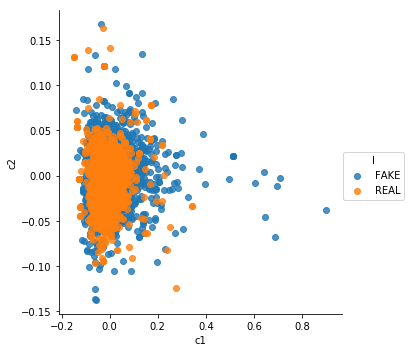

In [35]:
sns.lmplot( x="c1", y="c2", data=concat, fit_reg=False, hue='l', legend=True)

#### Note
In the above plot we see that there is no clear seperation of the principal components when it comes to fake and real news.

### Training a baseline model on POS features

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

In [37]:
from sklearn import metrics

In [38]:
X_train, X_test, y_train, y_test = train_test_split(total_count, label, test_size=0.33, random_state=53)

In [40]:
linear_clf = PassiveAggressiveClassifier(n_iter=500)

In [41]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

/Users/andrea/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.765
[[510 167]
 [139 486]]


### Conclusion
We have explored the pos tagging of real and fake news. We conclude that it might be useful for a stacking/ensamble model, whereby the POS tags will add information over the bag of word approch for title and text. 